In [46]:
# Initializing the app
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('wtam186_Iteration4').getOrCreate()

In [47]:
# Loading dataset
df = spark.read.csv('./Datasets/COVID-19 Survey Student Responses.csv', header='true')
df

DataFrame[ID: string, Region of residence: string, Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string]

# Step 2.1: Initial Inspection on the dataset

In [48]:
# Understanding the data by showing the top 10 rows and displaying specific columns in a clear and tidy format (to avoid output being truncated)
df.select("ID", "Region of residence", "Age of Subject", "Time spent on Online Class", "Rating of Online Class experience").show(10)
df.select("Medium for online class", "Time spent on self study", "Time spent on fitness", "Time spent on sleep").show(10)
df.select("Time spent on social media", "Prefered social media platform", "Time spent on TV", "Number of meals per day").show(10)
df.select("Change in your weight", "Health issue during lockdown", "Stress busters", "Time utilized").show(10)
df.select("Do you find yourself more connected with your family, close friends , relatives  ?", "What you miss the most").show(10)


+---+-------------------+--------------+--------------------------+---------------------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|
+---+-------------------+--------------+--------------------------+---------------------------------+
| R1|          Delhi-NCR|            21|                         2|                             Good|
| R2|          Delhi-NCR|            21|                         0|                        Excellent|
| R3|          Delhi-NCR|            20|                         7|                        Very poor|
| R4|          Delhi-NCR|            20|                         3|                        Very poor|
| R5|          Delhi-NCR|            21|                         3|                             Good|
| R6|          Delhi-NCR|            21|                         0|                        Very poor|
| R7|          Delhi-NCR|            19|                         2|               

# Step 2.2 Describing the data

In [49]:
# Obtaining the data type of each column
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Region of residence: string (nullable = true)
 |-- Age of Subject: string (nullable = true)
 |-- Time spent on Online Class: string (nullable = true)
 |-- Rating of Online Class experience: string (nullable = true)
 |-- Medium for online class: string (nullable = true)
 |-- Time spent on self study: string (nullable = true)
 |-- Time spent on fitness: string (nullable = true)
 |-- Time spent on sleep: string (nullable = true)
 |-- Time spent on social media: string (nullable = true)
 |-- Prefered social media platform: string (nullable = true)
 |-- Time spent on TV: string (nullable = true)
 |-- Number of meals per day: string (nullable = true)
 |-- Change in your weight: string (nullable = true)
 |-- Health issue during lockdown: string (nullable = true)
 |-- Stress busters: string (nullable = true)
 |-- Time utilized: string (nullable = true)
 |-- Do you find yourself more connected with your family, close friends , relatives  ?: string (nu

In [50]:
df.count()

1182

In [51]:
len(df.columns)

19

# Step 2.3: Data exploration

In [52]:
!pip3 install seaborn
!pip3 install --upgrade pip
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

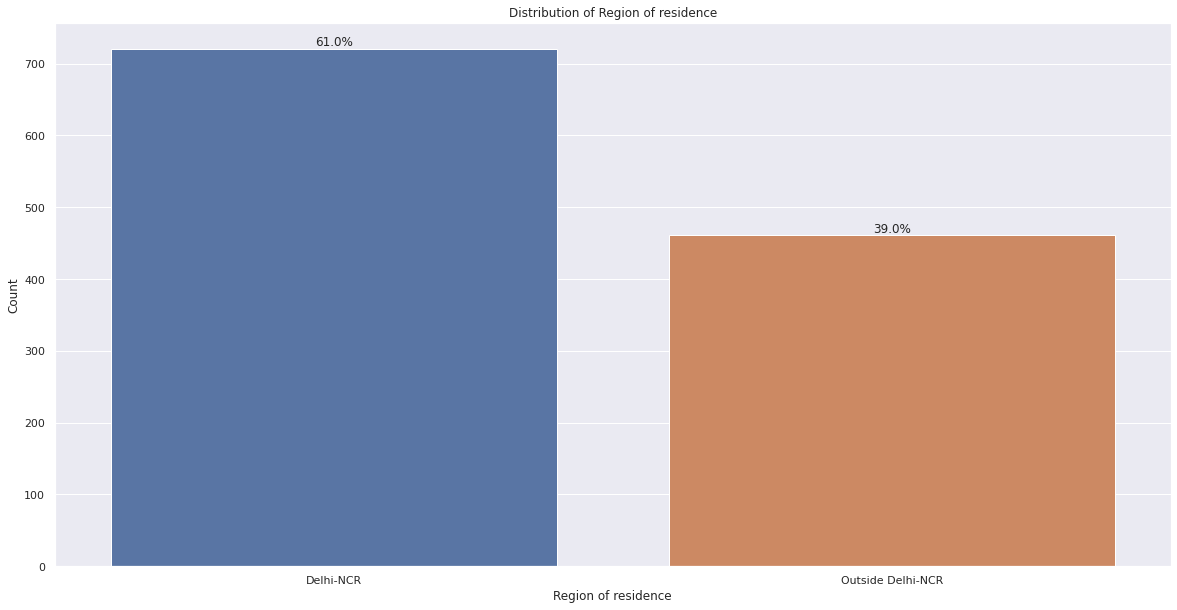

In [53]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the histogram for the 'Region of residence' column
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot

dfpd=pd.read_csv('./Datasets/COVID-19 Survey Student Responses.csv')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Region of residence', data=dfpd)
# Calculate percentages
total = len(dfpd)
counts = dfpd['Region of residence'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Region of residence')
plt.ylabel('Count')
plt.title('Distribution of Region of residence')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


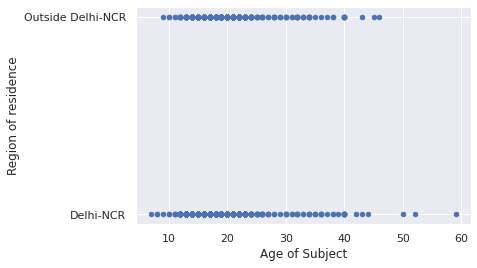

In [54]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the scatter plot
dfpd.plot(kind='scatter', x='Age of Subject', y='Region of residence')
plt.show()

In [55]:
### Use pyspark to count both null and missing values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------------------+--------------+--------------------------+---------------------------------+-----------------------+------------------------+---------------------+-------------------+--------------------------+------------------------------+----------------+-----------------------+---------------------+----------------------------+--------------+-------------+----------------------------------------------------------------------------------+----------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|Medium for online class|Time spent on self study|Time spent on fitness|Time spent on sleep|Time spent on social media|Prefered social media platform|Time spent on TV|Number of meals per day|Change in your weight|Health issue during lockdown|Stress busters|Time utilized|Do you find yourself more connected with your family, close friends , relatives  ?|What you miss the most|
+---+-------------------+--------------+----

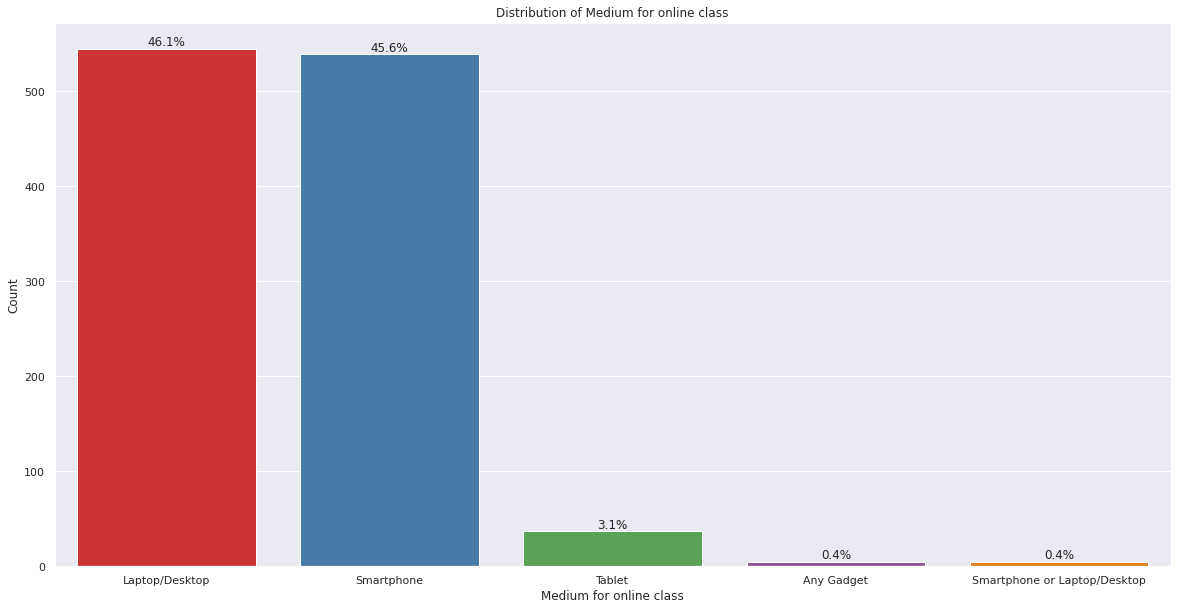

In [56]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the bar chart
sns.set(style='darkgrid')
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Medium for online class', data=dfpd, palette='Set1') # Change the palette for visualization
# Calculate percentages
total = len(dfpd)
counts = dfpd['Medium for online class'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Medium for online class')
plt.ylabel('Count')
plt.title('Distribution of Medium for online class')
plt.show()

In [60]:
#'df' is PySpark DataFrame

# Extract unique values from the 'Time spent on TV' column
unique_times = df.select('Time spent on TV').distinct()

# Count the occurrences of each unique value
time_counts = df.groupBy('Time spent on TV').agg(count('*').alias('count'))

# Collect the results and print them
print("Unique values of time spent on TV:")
unique_times.show(30)

print("\nCounts of each unique time:")
time_counts.show(30)

Unique values of time spent on TV:
+----------------+
|Time spent on TV|
+----------------+
|               7|
|            0.75|
|              15|
|             0.3|
|               3|
|               8|
|            0.25|
|             4.5|
|               0|
|             2.5|
|               5|
|               n|
|             3.5|
|               6|
|             0.5|
|             0.6|
|               N|
|             0.1|
|             1.5|
|               1|
|               4|
|                |
|           No tv|
|               2|
|             0.4|
+----------------+


Counts of each unique time:
+----------------+-----+
|Time spent on TV|count|
+----------------+-----+
|               7|    2|
|            0.75|    1|
|              15|    1|
|             0.3|   12|
|               3|   50|
|               8|    2|
|            0.25|    1|
|             4.5|    2|
|               0|  441|
|             2.5|    2|
|               5|   10|
|               n|    1|
|        